In [ ]:
# Text preprocessing

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string
import zipfile
import re
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.data.path.append("WordNet")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

# nltk.download()
# nltk.download('punkt')
# nltk.data.path.append("C:\\nltk_data")
# # nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('brown')

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", on_bad_lines='skip')

In [ ]:
reviews.head(5)

,So there is no way for me to plug it in here in the US unless I go by a converter.\t0
Good case,Excellent value.\t1
Great for the jawbone.\t1,NaN
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0,NaN
The mic is great.\t1,NaN
I have to jiggle the plug to get it to line up right to get decent volume.\t0,NaN


In [ ]:
reviews.shape

(946, 1)

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None, names=['Review', 'Score'])

In [ ]:
reviews = reviews.dropna().reset_index(drop=True)

In [ ]:
reviews.head(10)

,Review,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [ ]:
reviews['Score'].value_counts()

Score
0    500
1    500
Name: count, dtype: int64

In [ ]:
reviews.dtypes

Review    object
Score      int64
dtype: object

In [ ]:
reviews = reviews.astype({'Review':'string'})

In [ ]:
reviews.dtypes

Review    string[python]
Score              int64
dtype: object

In [ ]:
text = reviews['Review']
text[:5]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: Review, dtype: string

In [ ]:
text1 = []
for review in text:
    review = review.translate(str.maketrans('', '', string.punctuation))
    text1.append(review)

In [ ]:
print("1. Remove Punctuation:")
pd.Series(text1[:10])

1. Remove Punctuation:


0    So there is no way for me to plug it in here i...
1                            Good case Excellent value
2                                Great for the jawbone
3    Tied to charger for conversations lasting more...
4                                     The mic is great
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7              If you are Razr owneryou must have this
8                    Needless to say I wasted my money
9                       What a waste of money and time
dtype: object

In [ ]:
text2 = []
for review in text1:
    review = review.translate(str.maketrans('', '', string.digits))
    text2.append(review)

In [ ]:
print("2. Remove Numbers:")
pd.Series(text2[:10])

2. Remove Numbers:


0    So there is no way for me to plug it in here i...
1                            Good case Excellent value
2                                Great for the jawbone
3    Tied to charger for conversations lasting more...
4                                     The mic is great
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7              If you are Razr owneryou must have this
8                    Needless to say I wasted my money
9                       What a waste of money and time
dtype: object

In [ ]:
text3 = []
for review in text2:
    review = review.lower()
    text3.append(review)

In [ ]:
print("3. Convert to Lowercase:")
pd.Series(text3[:10])

3. Convert to Lowercase:


0    so there is no way for me to plug it in here i...
1                            good case excellent value
2                                great for the jawbone
3    tied to charger for conversations lasting more...
4                                     the mic is great
5    i have to jiggle the plug to get it to line up...
6    if you have several dozen or several hundred c...
7              if you are razr owneryou must have this
8                    needless to say i wasted my money
9                       what a waste of money and time
dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))
text4 = []
for review in text3:
    review = ' '.join(term for term in review.split() if term not in stop_words)
    text4.append(review)

In [ ]:
print("4. Remove Stop Words:")
pd.Series(text4[:10])

4. Remove Stop Words:


0                      way plug us unless go converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contacts imagine...
7                                   razr owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [ ]:
text5 = []
for review in text4:
    review = str(TextBlob(review).correct())
    text5.append(review)

In [ ]:
print("5. Spell Correction:")
pd.Series(text5[:10])

5. Spell Correction:


0                      way plug us unless go converted
1                            good case excellent value
2                                        great jawbone
3    tied charge conversations lasting minutesmajor...
4                                            mid great
5         jingle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                  razor owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [ ]:
text6 = []
for review in text5:
    cleaned_review = ' '.join(word for word in review.split() if word.isalpha())
    text6.append(cleaned_review)

In [ ]:
print("6. Remove Non-Alphabetic Words:")
pd.Series(text6[:10])

6. Remove Non-Alphabetic Words:


0                      way plug us unless go converted
1                            good case excellent value
2                                        great jawbone
3    tied charge conversations lasting minutesmajor...
4                                            mid great
5         jingle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                  razor owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [ ]:
text7 = []
for i in range(len(text6)):
    cleaned_review = unidecode.unidecode(text6[i])
    text7.append(cleaned_review)

In [ ]:
print("\n7. Remove Accented Characters:")
pd.Series(text7[:10])


7. Remove Accented Characters:


0                      way plug us unless go converted
1                            good case excellent value
2                                        great jawbone
3    tied charge conversations lasting minutesmajor...
4                                            mid great
5         jingle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                  razor owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [ ]:
# import nltk
# print(nltk.data.path)

In [ ]:
# import os
# import nltk
# import shutil
#
# wordnet_zip_path = 'C:/nltk_data/corpora/wordnet.zip'
#
# target_directories = [
#     'C:\\Users\\kremn\\nltk_data\\corpora',
#     'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data\\corpora',
#     'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data\\corpora',
#     'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data\\corpora',
#     'C:\\Users\\kremn\\AppData\\Roaming\\nltk_data\\corpora'
# ]
#
# for directory in target_directories:
#     os.makedirs(directory, exist_ok=True)
#
# for directory in target_directories:
#     shutil.copy(wordnet_zip_path, os.path.join(directory, 'wordnet.zip'))
#
# for directory in target_directories:
#     nltk.data.path.append(directory)
#
# print("NLTK Data Path:", nltk.data.path)

NLTK Data Path: ['C:\\Users\\kremn/nltk_data', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data', 'C:\\Users\\kremn\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'WordNet', 'C:\\Users\\kremn\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Roaming\\nltk_data\\corpora', 'WordNet', 'C:\\Users\\kremn\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data\\corpora', 'C:\\Users\\kremn\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data\\corpora', 'C:\\User

In [ ]:
text8 = pd.Series(text7)
def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
text8 = text8.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))

In [ ]:
print("\n8. Lemmatizing with POS Tags:")
pd.Series(text8[:10])


8. Lemmatizing with POS Tags:


0                         way plug u unless go convert
1                            good case excellent value
2                                        great jawbone
3    tie charge conversation last minutesmajor problem
4                                            mid great
5         jingle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                  razor owneryou must
8                               needle say waste money
9                                     waste money time
dtype: object

In [ ]:
#############################################
###########  classification  ################

In [ ]:
reviewsP = pd.DataFrame({'Review': text8, 'Score': reviews['Score']})
reviewsP

,Review,Score
0,way plug u unless go convert,0
1,good case excellent value,1
2,great jawbone,1
3,tie charge conversation last minutesmajor problem,0
4,mid great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece june lose call phone,0
997,item match picture,0
998,thing disappoint infra red port ida,0


In [ ]:
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

,index,Review,Score
0,507,bolster arrive match photo ad,0
1,818,doesn job,0
2,452,colleague get great reception little expensive...,1
3,368,love phone,1
4,242,bad customer service ever,0


In [ ]:
train_reviews = reviewsP1.Review[:700]
train_score = reviewsP1.Score[:700]

test_reviews = reviewsP1.Review[700:]
test_score = reviewsP1.Score[700:]

print(train_reviews.shape,train_score.shape)
print(test_reviews.shape,test_score.shape)

(700,) (700,)
(300,) (300,)


In [ ]:
train_reviews[0]

'bolster arrive match photo ad'

In [ ]:
cv=CountVectorizer()

cv_train_reviews=cv.fit_transform(train_reviews)
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (700, 1136)
BOW_cv_test: (300, 1136)


In [ ]:
print(cv_train_reviews[0])

  (0, 112)	1
  (0, 60)	1
  (0, 594)	1
  (0, 716)	1
  (0, 17)	1


In [ ]:
print(train_score)
print(test_score)

0      0
1      0
2      1
3      1
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Name: Score, Length: 700, dtype: int64
700    0
701    1
702    0
703    1
704    1
      ..
995    0
996    1
997    1
998    1
999    0
Name: Score, Length: 300, dtype: int64


In [ ]:
# Random Forest Classifier

DT_bow accuracy : 0.7866666666666666
[[119  29]
 [ 35 117]] 

              precision    recall  f1-score   support

    Positive       0.77      0.80      0.79       148
    Negative       0.80      0.77      0.79       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

roc_auc_score for DT:  0.8789784850640114


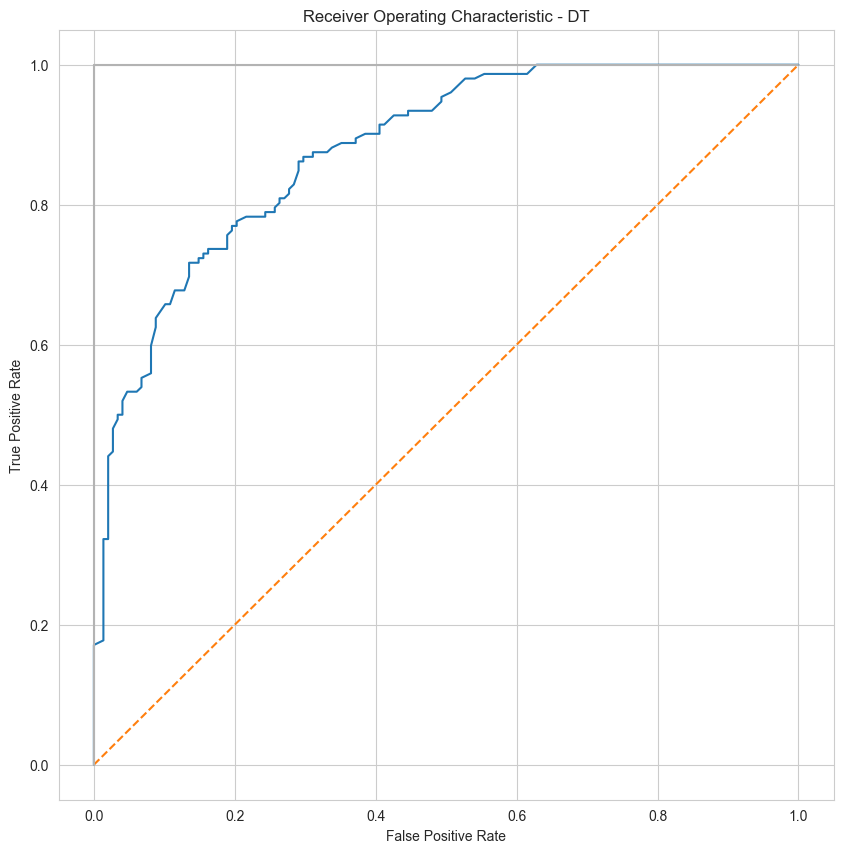

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=0)

RF_fit = RF.fit(cv_train_reviews,train_score)

RF_predict = RF.predict(cv_test_reviews)

RF_score=accuracy_score(test_score,RF_predict)
print("DT_bow accuracy :",RF_score)

RF_report=classification_report(test_score,RF_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_score,RF_predict), '\n')
print(RF_report)

RF_probs = RF.predict_proba(cv_test_reviews)[:, 1]

FP, TP, threshold1 = roc_curve(test_score, RF_probs)
print('roc_auc_score for RF: ', roc_auc_score(test_score, RF_probs))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Gradient Boosting Classifier

Gradient Boosting accuracy: 0.7833333333333333
[[130  18]
 [ 47 105]] 

              precision    recall  f1-score   support

    Positive       0.73      0.88      0.80       148
    Negative       0.85      0.69      0.76       152

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300

roc_auc_score for Gradient Boosting: 0.8535739687055477


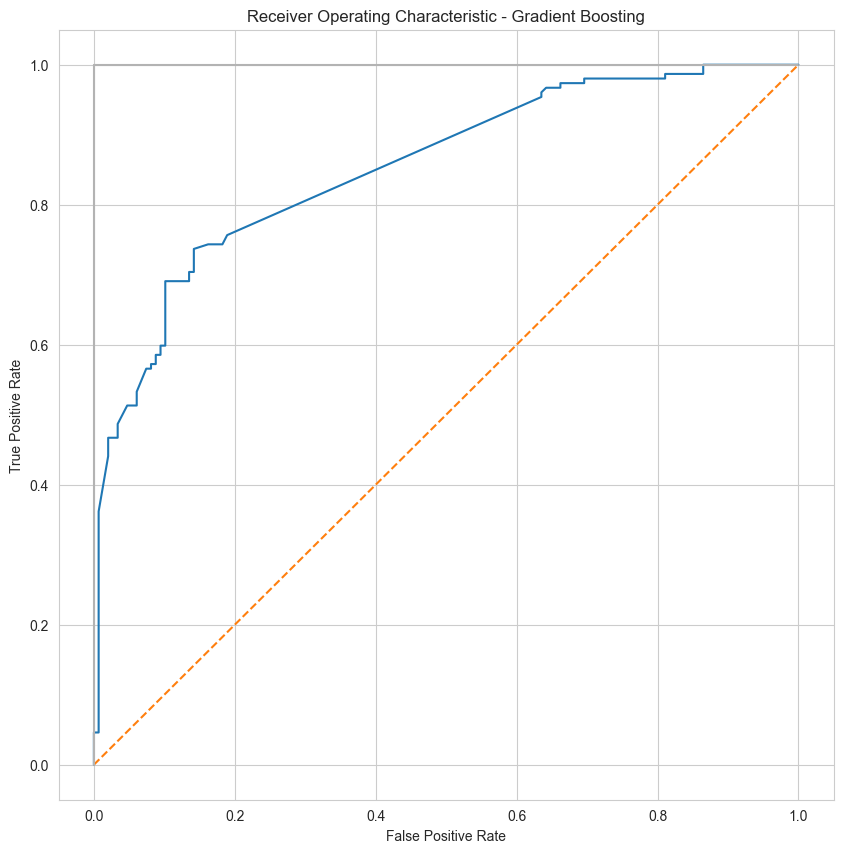

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=0)
GB_fit = GB.fit(cv_train_reviews, train_score)

GB_predict = GB.predict(cv_test_reviews)

GB_score = accuracy_score(test_score, GB_predict)
print("Gradient Boosting accuracy:", GB_score)

GB_report = classification_report(test_score, GB_predict, target_names=['Positive', 'Negative'])
print(confusion_matrix(test_score, GB_predict), '\n')
print(GB_report)

GB_probs = GB.predict_proba(cv_test_reviews)[:, 1]

FP, TP, threshold1 = roc_curve(test_score, GB_probs)
print('roc_auc_score for Gradient Boosting:', roc_auc_score(test_score, GB_probs))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Logistic Regression

Logistic Regression accuracy: 0.79
[[122  26]
 [ 37 115]] 

              precision    recall  f1-score   support

    Positive       0.77      0.82      0.79       148
    Negative       0.82      0.76      0.78       152

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

roc_auc_score for Logistic Regression: 0.8763113442389758


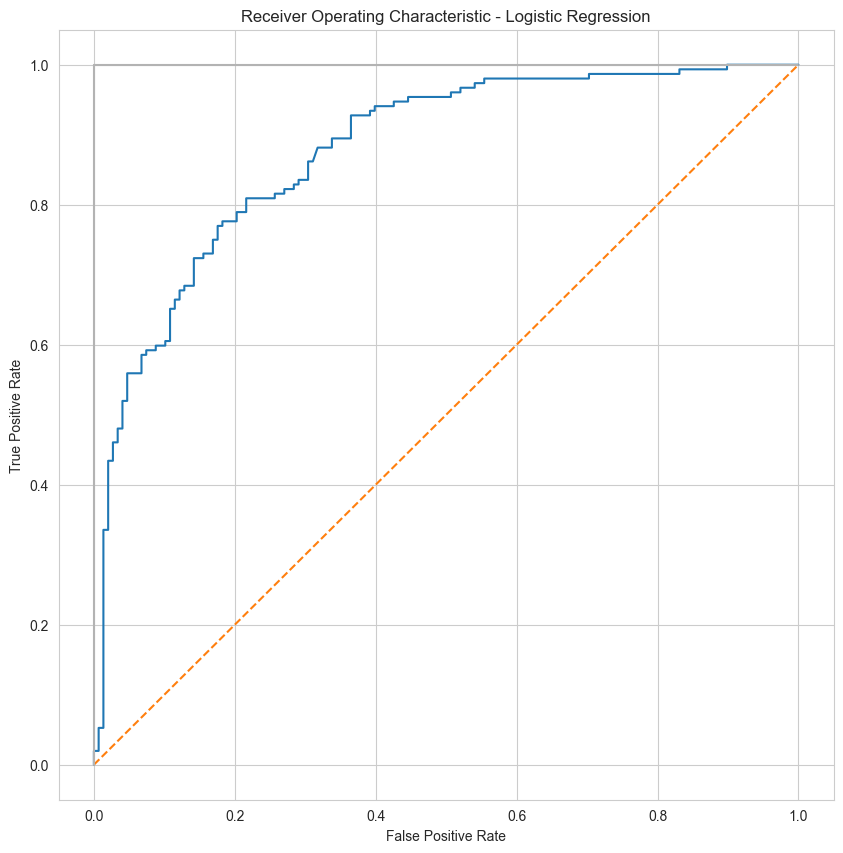

In [ ]:
# Logistic Regression
LR = LogisticRegression(random_state=0)
LR_fit = LR.fit(cv_train_reviews, train_score)

LR_predict = LR.predict(cv_test_reviews)

# Accuracy score for bag of words
LR_score = accuracy_score(test_score, LR_predict)
print("Logistic Regression accuracy:", LR_score)

# Classification report for bag of words
LR_report = classification_report(test_score, LR_predict, target_names=['Positive', 'Negative'])
print(confusion_matrix(test_score, LR_predict), '\n')
print(LR_report)

# Predict probabilities for the positive class (class 1) for Logistic Regression
LR_probs = LR.predict_proba(cv_test_reviews)[:, 1]

FP, TP, threshold1 = roc_curve(test_score, LR_probs)
print('roc_auc_score for Logistic Regression:', roc_auc_score(test_score, LR_probs))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


DT_bow accuracy : 0.7966666666666666
[[126  22]
 [ 39 113]] 

              precision    recall  f1-score   support

    Positive       0.76      0.85      0.81       148
    Negative       0.84      0.74      0.79       152

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

roc_auc_score for DT:  0.8135224039829303


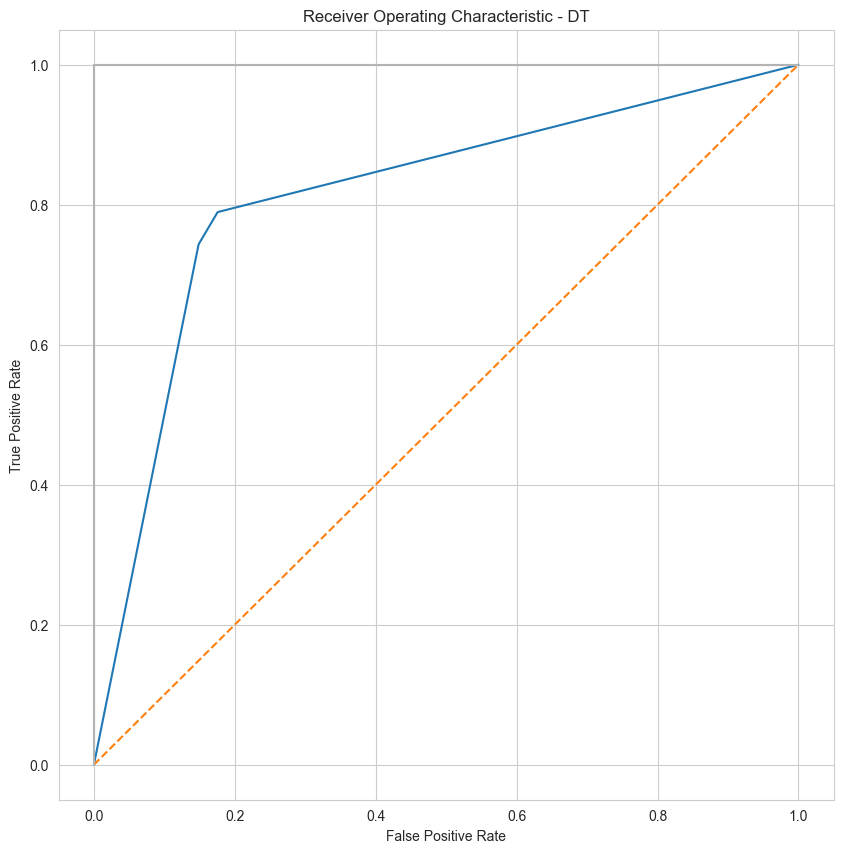

In [ ]:
############################################
###           Decision Tree              ###
############################################
#training the model
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for Bag of words
DT_bow=DT.fit(cv_train_reviews,train_score)

#Predicting the model for bag of words
DT_bow_predict=DT.predict(cv_test_reviews)

#Accuracy score for bag of words
DT_bow_score=accuracy_score(test_score,DT_bow_predict)
print("DT_bow accuracy :",DT_bow_score)

#Classification report for bag of words
DT_bow_report=classification_report(test_score,DT_bow_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_score,DT_bow_predict), '\n')
print(DT_bow_report)

# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class (class 1) for Decision Tree
DT_bow_probs = DT.predict_proba(cv_test_reviews)[:, 1]

FP, TP, threshold1 = roc_curve(test_score, DT_bow_probs)
print('roc_auc_score for DT: ', roc_auc_score(test_score, DT_bow_probs))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Decision Tree']
accuracies = []
roc_auc_scores = []

for model, name in zip(models, model_names):
    predictions = model.predict(cv_test_reviews)
    accuracy = accuracy_score(test_score, predictions)
    accuracies.append(accuracy)

    probs = model.predict_proba(cv_test_reviews)[:, 1]
    roc_auc = roc_auc_score(test_score, probs)
    roc_auc_scores.append(roc_auc)

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_auc_scores
})

print(results_df)

                 Model  Accuracy   ROC AUC
0        Random Forest  0.786667  0.878978
1    Gradient Boosting  0.783333  0.853574
2  Logistic Regression  0.790000  0.876311
3        Decision Tree  0.796667  0.813522


In [ ]:
rf_metrics = precision_recall_fscore_support(test_score, RF_predict, average=None)
rf_ac = accuracy_score(test_score, RF_predict)
rf_roc_auc = roc_auc_score(test_score, RF_predict)

gb_metrics = precision_recall_fscore_support(test_score, GB_predict, average=None)
gb_ac = accuracy_score(test_score, GB_predict)
gb_roc_auc = roc_auc_score(test_score, GB_predict)

lr_metrics = precision_recall_fscore_support(test_score, LR_predict, average=None)
lr_ac = accuracy_score(test_score, LR_predict)
lr_roc_auc = roc_auc_score(test_score, LR_predict)

dt_metrics = precision_recall_fscore_support(test_score, DT_bow_predict, average=None)
dt_ac = accuracy_score(test_score, DT_bow_predict)
dt_roc_auc = roc_auc_score(test_score, DT_bow_predict)

metrics_data = {
    'Metric': ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)', 'ROC AUC'],
    'RF': [rf_ac, *rf_metrics[0], *rf_metrics[1], *rf_metrics[2], rf_roc_auc],
    'GB': [gb_ac, *gb_metrics[0], *gb_metrics[1], *gb_metrics[2], gb_roc_auc],
    'LR': [lr_ac, *lr_metrics[0], *lr_metrics[1], *lr_metrics[2], lr_roc_auc],
    'DT': [dt_ac, *dt_metrics[0], *dt_metrics[1], *dt_metrics[2], dt_roc_auc]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Metric', inplace=True)
metrics_df

,RF,GB,LR,DT
Metric,,,,
Accuracy,0.786667,0.783333,0.790000,0.796667
Precision (Class 0),0.772727,0.734463,0.767296,0.763636
Precision (Class 1),0.801370,0.853659,0.815603,0.837037
Recall (Class 0),0.804054,0.878378,0.824324,0.851351
Recall (Class 1),0.769737,0.690789,0.756579,0.743421
F1-Score (Class 0),0.788079,0.800000,0.794788,0.805112
F1-Score (Class 1),0.785235,0.763636,0.784983,0.787456
ROC AUC,0.786895,0.784584,0.790452,0.797386


In [ ]:
###################################################
#####   classification using a BERT-based model ##

In [ ]:
!pip3 install tensorflow-text

     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/5.0 MB 2.9 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.0 MB 5.4 MB/s eta 0:00:01
     --------- ------------------------------ 1.1/5.0 MB 7.3 MB/s eta 0:00:01
     ------------ --------------------------- 1.6/5.0 MB 7.3 MB/s eta 0:00:01
     ---------------------------- ----------- 3.5/5.0 MB 12.5 MB/s eta 0:00:01
     ---------------------------------------  5.0/5.0 MB 15.2 MB/s eta 0:00:01
     ---------------------------------------- 5.0/5.0 MB 13.9 MB/s eta 0:00:00
  Obtaining dependency information for tensorflow-hub>=0.8.0 from https://files.pythonhosted.org/packages/6e/1a/fbae76f4057b9bcdf9468025d7a8ca952dec14bfafb9fc0b1e4244ce212f/tensorflow_hub-0.15.0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
     --------------------------------------- 1.0/455.9 MB 33.4 MB/s eta 0:00:14
  


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install numba

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/f8/14/546925a397d7638858a890a01d82cc6de147fca294eccf93ee11b524ca3c/numba-0.58.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/88/99/aa829162a871f0f91dba9a0344726449cafbff4e9e55d7a714051cbb6215/llvmlite-0.41.1-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.6 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.6 MB 10.5 MB/s eta 0:00:01
   --------------------- ------------------ 1.4/2.6 MB 10.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.1 MB/s eta 0:00:00
   ------------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install wheel

In [ ]:
!pip install tf-models-official

  Using cached tf_models_official-2.15.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Using cached immutabledict-4.1.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached kaggle-1.5.16.tar.gz (83 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/98.2 kB ? eta -:--:--
     ---------------------------------------- 98.2/98.2 kB 5.5 MB/s eta 0:00:00
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
  Using cached sacrebleu-2.4.0-py3-none-any.whl.metadata (57 kB)
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/977.6 kB ? eta -:--:--
     ----------------- -------------------- 450.6/977.6 kB 9

  You can safely remove it manually.


In [ ]:
pip install build

  Using cached build-1.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached pyproject_hooks-1.0.0-py3-none-any.whl (9.3 kB)
Using cached build-1.0.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install transformers

     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     ---------------------------- ---------- 92.2/126.8 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 126.8/126.8 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
    --------------------------------------- 0.2/8.2 MB 3.1 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.2 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.2 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/8.2 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/8.2 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.2 MB 2.3 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/8.2 MB 2.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/8.2 MB 2.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.2 MB 2.5 MB/s eta 0:00:03
   ------ ----

DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import os
import shutil
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
%matplotlib inline

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", on_bad_lines='skip')

In [ ]:
reviews.head(5)

,So there is no way for me to plug it in here in the US unless I go by a converter.\t0
Good case,Excellent value.\t1
Great for the jawbone.\t1,NaN
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0,NaN
The mic is great.\t1,NaN
I have to jiggle the plug to get it to line up right to get decent volume.\t0,NaN


In [ ]:
reviews.shape

(946, 1)

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None, names=['Review', 'Score'])

In [ ]:
reviews = reviews.dropna().reset_index(drop=True)

In [ ]:
reviews.head(10)

,Review,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [ ]:
reviews['Score'].value_counts()

0    500
1    500
Name: Score, dtype: int64

In [ ]:
reviews.dtypes

Review    object
Score      int64
dtype: object

In [ ]:
reviews = reviews.astype({'Review':'string'})

In [ ]:
reviews.dtypes

Review    string
Score      int64
dtype: object

In [ ]:
reviews.shape

(1000, 2)

In [ ]:
reviews = reviews.sample(frac=1, random_state=1)
reviews.reset_index(drop=True, inplace=True)

In [ ]:
reviews.head()

,Review,Score
0,Treo and T-Mobile refused to replace it again ...,0
1,It fits my ear well and is comfortable on.,1
2,"It works fine on my Motorola 325 cellphone, an...",1
3,Oh and I forgot to also mention the weird colo...,0
4,I am also very happy with the price.,1


In [ ]:
X, X_test, y, y_test = (train_test_split(reviews['Review'], reviews['Score'],
                                                     stratify=reviews['Score'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))

In [ ]:
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
reviews['Review'][0]

'Treo and T-Mobile refused to replace it again and forced me to buy another phone without any kind of upgrade discount.'

In [ ]:
text_test = ["This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was a superb episode, one of the best of both seasons."]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  2023  2001  1037 21688  2792  1010  2028  1997  1996  2190  1997]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.6901299   0.99756277 -0.3208749   0.03474531  0.6150474  -0.91803926
  0.9794196  -0.854188   -0.5536     -0.99389905 -0.14277233 -0.9524568 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.01881617 -0.19083801  0.3050598  ... -0.81572354 -0.2143654
   0.4443283 ]
 [-0.51914114  0.05107703 -0.3387493  ...  1.2194269  -0.7392854
   0.8853782 ]
 [-0.45957828  0.15729094 -0.89442855 ...  0.89337873 -0.33719978
   0.58194757]
 ...
 [-0.5031906   0.23234262 -2.4240851  ... -1.0548139   0.775113
  -0.36098665]
 [-1.4614178   0.20342398 -0.8485448  ... -0.09167142 -0.07505965
  -0.01238689]
 [-1.6349399   0.33674505 -1.0467939  ...  0.22726572 -0.938206
  -0.24242482]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  #net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()

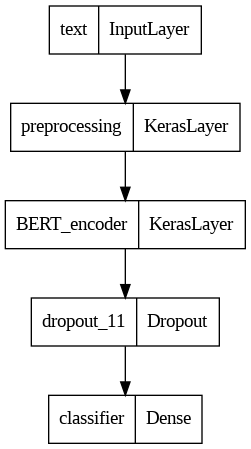

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
epochs = 20
steps_per_epoch = 1000
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 1e-4
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                           

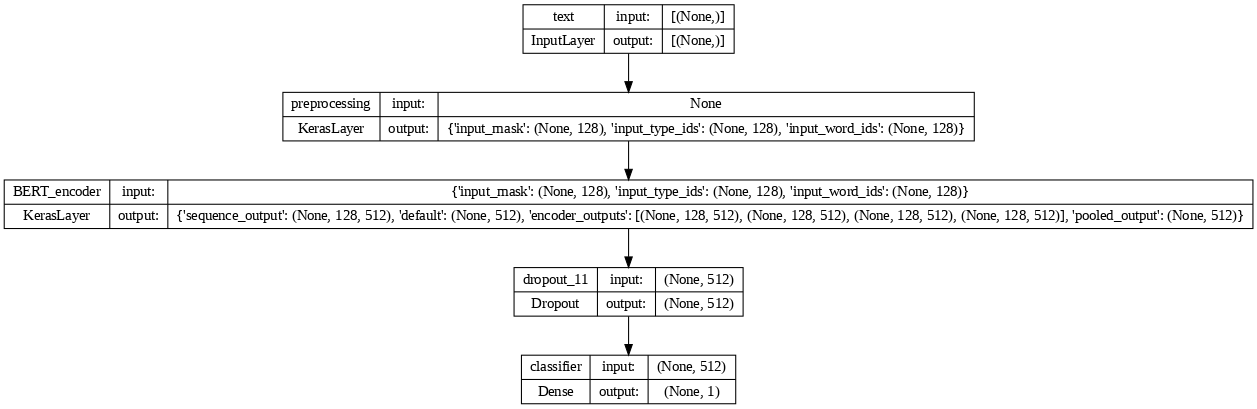

In [ ]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs,
                               #batch_size=128 #16, 32, 64
                               )

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/20
19/19 [==============================] - 11s 265ms/step - loss: 0.7313 - binary_accuracy: 0.5000 - val_loss: 0.7210 - val_binary_accuracy: 0.5300
Epoch 2/20
19/19 [==============================] - 5s 271ms/step - loss: 0.7187 - binary_accuracy: 0.5000 - val_loss: 0.6999 - val_binary_accuracy: 0.5300
Epoch 3/20
19/19 [==============================] - 5s 241ms/step - loss: 0.7021 - binary_accuracy: 0.5333 - val_loss: 0.6706 - val_binary_accuracy: 0.5400
Epoch 4/20
19/19 [==============================] - 5s 244ms/step - loss: 0.6816 - binary_accuracy: 0.5583 - val_loss: 0.6316 - val_binary_accuracy: 0.5800
Epoch 5/20
19/19 [==============================] - 5s 267ms/step - loss: 0.6335 - binary_accuracy: 0.5933 - val_loss: 0.6038 - val_binary_accuracy: 0.5950
Epoch 6/20
19/19 [==============================] - 5s 243ms/step - loss: 0.6090 - binary_accuracy: 0.6283 - val_loss: 0.5661 -

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


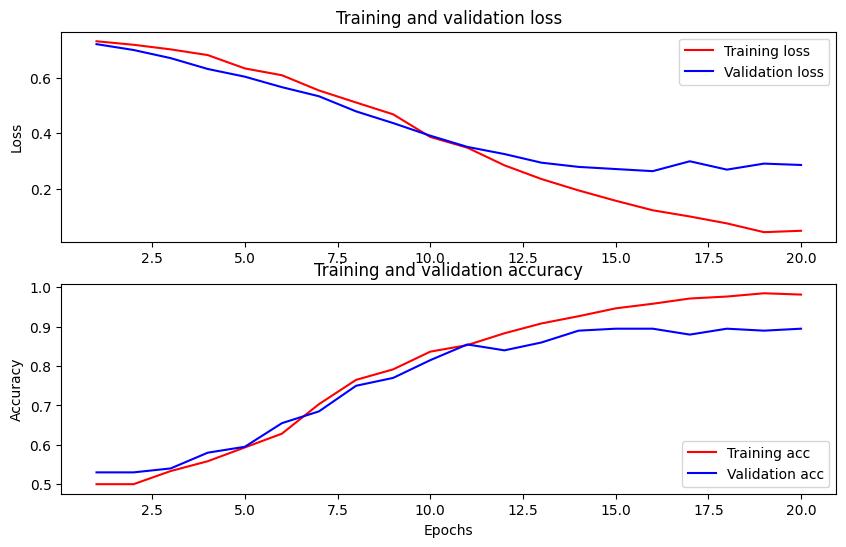

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 1s 86ms/step - loss: 0.2568 - binary_accuracy: 0.9200
Loss: 0.25677284598350525
Accuracy: 0.9200000166893005


In [ ]:
y_pred=classifier_model.predict(X_test)
print(y_pred.flatten())

7/7 [==============================] - 1s 99ms/step
[ 6.2812490e+00 -6.4123597e+00 -6.7229509e+00  2.0659108e+00
  3.9561610e+00 -7.0309706e+00 -5.8090329e+00  6.7697744e+00
 -7.0685568e+00  6.8343115e+00 -6.0680270e+00 -1.7254189e-01
 -6.7898927e+00 -3.1535478e+00 -4.9729495e+00 -6.6621761e+00
  5.8654523e+00  4.8654885e+00  6.3531160e+00  6.7679424e+00
 -6.8106151e+00  2.6688094e+00 -4.1904569e+00 -6.7896285e+00
 -5.8768129e+00 -1.0418377e+00 -6.0670571e+00  5.3738647e+00
  6.1259246e+00 -5.9582109e+00 -5.5256777e+00 -5.5347786e+00
  5.8225484e+00  5.2268767e+00  6.4693580e+00  5.9089828e+00
 -5.2393341e+00  5.5616398e+00 -3.5705171e+00  5.8513629e-01
 -6.7857423e+00 -3.7620199e+00  6.9467907e+00 -6.8136721e+00
 -4.7361422e+00  2.8863042e-03  6.3035884e+00  3.0804296e+00
 -6.8988843e+00  2.1935287e+00  4.6131940e+00 -4.1599188e+00
  6.5851703e+00  1.9891341e+00  4.7100611e+00 -6.7202463e+00
 -5.4408197e+00 -5.5691381e+00 -4.8418293e+00 -7.6621425e-01
  5.2635083e+00  2.0469232e+00 -7

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1
print(y_pred.flatten())

[1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0.]


In [ ]:
print(confusion_matrix(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[94  6]
 [10 90]] 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.94      0.90      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

Accuracy: 0.92
AUC: 0.9199999999999999


Metric			                RF	        GB	        LR	        DT	    Bert
Accuracy	        		0.786667	0.783333	0.79	    0.796667	0.92
Precision	(Class 0)		0.772727	0.734463	0.767296	0.763636	0.9
Precision	(Class 1)		0.80137	    0.853659	0.815603	0.837037	0.94
Recall	    (Class 0)		0.804054	0.878378	0.824324	0.851351	0.94
Recall	    (Class 1)		0.769737	0.690789	0.756579	0.743421	0.9
F1-Score	(Class 0)		0.788079	0.8	        0.794788	0.805112	0.92
F1-Score	(Class 1)		0.785235	0.763636	0.784983	0.787456	0.92
ROC AUC			            0.786895	0.784584	0.790452	0.797386	0.92


In [ ]:
##################################################################
####                 Topic Detection                 ############

In [ ]:
!pip install pyldavis

In [ ]:
import numpy as np
import pandas as pd
from pprint import pprint
import nltk
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

import string
from nltk.corpus import stopwords
from textblob import TextBlob
import unidecode
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import pyLDAvis.gensim_models
import pyLDAvis

# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [ ]:
%matplotlib inline

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", on_bad_lines='skip')

In [ ]:
reviews.head(5)

,So there is no way for me to plug it in here in the US unless I go by a converter.\t0
Good case,Excellent value.\t1
Great for the jawbone.\t1,NaN
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0,NaN
The mic is great.\t1,NaN
I have to jiggle the plug to get it to line up right to get decent volume.\t0,NaN


In [ ]:
reviews.shape

(946, 1)

In [ ]:
reviews = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None, names=['Review', 'Score'])

In [ ]:
reviews = reviews.dropna().reset_index(drop=True)

In [ ]:
reviews.head(10)

,Review,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [ ]:
reviews['Score'].value_counts()

Score
0    500
1    500
Name: count, dtype: int64

In [ ]:
reviews.dtypes

Review    object
Score      int64
dtype: object

In [ ]:
reviews = reviews.astype({'Review':'string'})

In [ ]:
reviews.dtypes

Review    string[python]
Score              int64
dtype: object

In [ ]:
text = reviews['Review']

In [ ]:
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

text1 = []

for review in text:
    cleaned_review = review.translate(str.maketrans('', '', string.punctuation))
    cleaned_review = cleaned_review.translate(str.maketrans('', '', string.digits))
    cleaned_review = cleaned_review.lower()
    cleaned_review = ' '.join(term for term in cleaned_review.split() if term not in stop_words)
    cleaned_review = str(TextBlob(cleaned_review).correct())
    cleaned_review = ' '.join(word for word in cleaned_review.split() if word.isalpha())
    # cleaned_review = unidecode.unidecode(cleaned_review)
    cleaned_review = ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_review.split())
    cleaned_review = ' '.join(ps.stem(term) for term in cleaned_review.split() if term not in stop_words)
    text1.append(cleaned_review)

text1 = pd.Series(text1)

In [ ]:
reviewsP = pd.DataFrame(reviews, columns=['Review', 'Score'])
reviewsP

,Review,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [ ]:
data = reviewsP.Review.values.tolist()
data

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence)))

In [ ]:
words = list(sent_to_words(data))
print(words[:1][0][:30])

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [ ]:
id2word = corpora.Dictionary(words)

In [ ]:
texts = words

In [ ]:
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [ ]:
num_topics = 2

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes=20,
                                       # alpha=0.5,
                                       eta=0.5
                                       )

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.047*"the" + 0.030*"is" + 0.023*"and" + 0.020*"phone" + 0.017*"this" + '
  '0.017*"it" + 0.017*"great" + 0.017*"to" + 0.016*"very" + 0.014*"of"'),
 (1,
  '0.044*"the" + 0.038*"it" + 0.032*"and" + 0.019*"this" + 0.018*"to" + '
  '0.017*"not" + 0.016*"with" + 0.014*"my" + 0.013*"in" + 0.012*"is"')]


In [ ]:
pyLDAvis.enable_notebook()

LDAvis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.072374  0.0       1        1  51.250154
1     -0.072374  0.0       2        1  48.749846, topic_info=        Term        Freq       Total Category  logprob  loglift
22     great   83.000000   83.000000  Default  30.0000  30.0000
80      very   87.000000   87.000000  Default  29.0000  29.0000
71   quality   41.000000   41.000000  Default  28.0000  28.0000
102      not  100.000000  100.000000  Default  27.0000  27.0000
7         it  263.000000  263.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
36      have   25.704311   62.261191   Topic2  -5.2044  -0.1662
145      use   19.331108   35.427669   Topic2  -5.4893   0.1127
159      had   18.906314   41.262693   Topic2  -5.5116  -0.0620
57       are   18.425932   36.245082   Topic2  -5.5373   0.0419
131      but   18.315204   39.581918   Topic2  -5.5433  -0.0522

[149 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
130       1  0.090528   again
130       2  0.905280   again
860       1  0.117665  amazon
860       2  0.941316  amazon
67        1  0.436815     and
...     ...       ...     ...
707       1  0.957721   worst
129       1  0.236157   would
129       2  0.742209   would
56        1  0.477646     you
56        2  0.527058     you

[171 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.4116934437035184
